<a href="https://colab.research.google.com/github/dellaanima/AIFFEL_QUEST/blob/master/DLBasic/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드 및 전처리

In [12]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [13]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


표준화 작업

In [18]:
# 컬럼별로 평균 구하기
mean = train_data.mean(axis=0)

# 컬럼별로 분산 구하기
std = train_data.std(axis = 0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# 모델 구성 및 컴파일

In [34]:
from tensorflow.keras import models, layers

# 신경망 모델 구성 (예시로 간단한 모델을 사용)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

# 모델 컴파일 (손실 함수는 평균 제곱 오차(mse) 사용)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# 모델 학습 (예시로 10번의 에포크로 학습)
history = model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_data=(test_data, test_labels))


Epoch 1/100
51/51 [==============================] - 1s 6ms/step - loss: 376.4345 - mae: 17.3227 - val_loss: 189.0192 - val_mae: 11.8194
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 91.1631 - mae: 7.2600 - val_loss: 44.4464 - val_mae: 5.2072
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 32.4703 - mae: 4.1416 - val_loss: 27.3092 - val_mae: 4.0952
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 22.8217 - mae: 3.3524 - val_loss: 22.7290 - val_mae: 3.7952
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 18.7034 - mae: 3.0371 - val_loss: 22.5275 - val_mae: 3.5800
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 16.2339 - mae: 2.7607 - val_loss: 21.8556 - val_mae: 3.4970
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 14.4510 - mae: 2.6328 - val_loss: 19.4852 - val_mae: 3.1779
Epoch 8/100
51/51 [==============================] - 0s 3ms/step 

<ipython-input-35-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


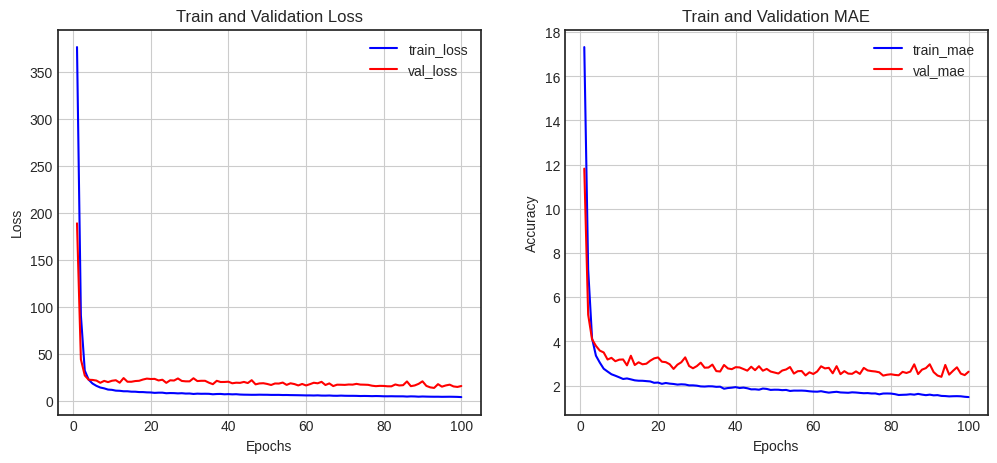

In [35]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [36]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 16.0596 - mae: 2.6258


[16.059646606445312, 2.6257708072662354]